# 03-3. 특성 공학과 규제
- 다중 회귀: 여러 개의 특성을 사용한 선형 회귀
- 특성 공학: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
    - 농어 길이*농어 높이

## 데이터 준비

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기
- 변환기: 특성을 만들거나 전처리하기 위한 다양한 클래스
    - fit(): 훈련, 새롭게 만들 특성 조합을 찾음
    - transform(): 변환, 실제로 데이터를 변환

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


- 2, 3을 제곱한 4, 9 추가
- 2와 3을 곱한 6 추가
- 1: 선형 방정식의 절편
    - 사이킷런의 선형 모델은 자동으로 절변을 추가하므로 특성을 만들 필요 X
$$ 무게 = a * 길이+b*높이+c*두께+d*1 $$

In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [9]:
print(train_poly.shape)

(42, 9)


In [12]:
train_poly[0]

array([ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
        26.4196,  15.6256,   9.2416])

get_feature_names_out() 메서드로 9개의 특성이 각각 어떤 입력과 조합으로 만들어졌는지 확인

In [10]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [13]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [15]:
print(lr.score(test_poly, test_target))

0.9714559911594134


과소적합은 남아있음

5제곱까지 특성을 추가

In [16]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [17]:
print(train_poly.shape)

(42, 55)


In [18]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [19]:
print(lr.score(test_poly, test_target))

-144.40579242684848


특성의 개수를 크게 늘리면 선형 모델은 훈련 세트에 대해 거의 완벽하게 학습할 수 있음    

하지만, 이런 모델은 훈련 세트에 너무 과대적합됨

## 규제
- 규제: 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것
    - 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
    - 선형 회귀 모델의 경우 특성에 곱해지느느 계수(또는 기울기)의 크기를 작게 만드는 일
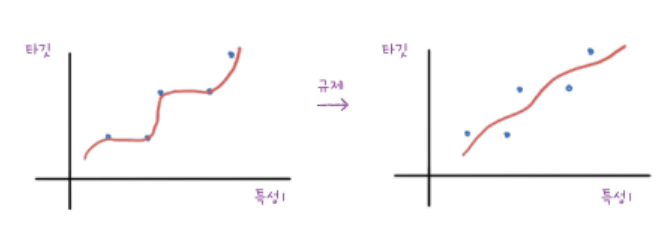

특성의 스케일이 정규화되지 않으면 곱해지는 계수의 값에도 차이가 발생    
-> 사이킷런의 StandardScaler로 정규화

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- 선형회귀에 규제를 추가한 모델을 릿지와 라쏘라고 부름
- 릿지: 계수를 제공한 값을 기준으로 규제를 적용
- 라쏘: 계수의 절대값을 기준으로 기준을 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있음

## 릿지


In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [22]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


In [25]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

- alpha 매개변수로 릿지와 라쏘 모델에서 규제의 양을 임의로 조절할 수 있음   
    - alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄여 과소적합되도록 유도
    - alpha 값이 작으면 계수를 줄이는 역할이 줄어들어 과대적합될 가능성이 큼

In [26]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

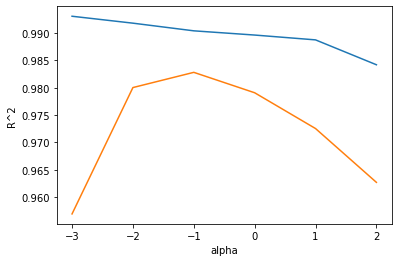

In [27]:
plt.plot(np.log10(alpha_list), train_score) # alpha 값을 동일한 간격으로 나타내기 위해 log10 사용
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

두 그래프가 가장 가깝고 테스트 세트 점수가 높은 -1, 즉 0.1이 적절한 alpha 값

In [29]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


## 라쏘

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [31]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [32]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


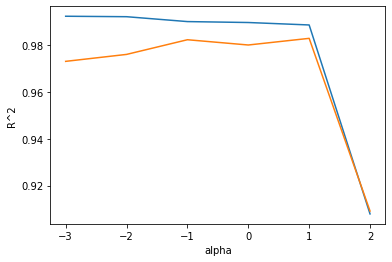

In [33]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

최적의 alpha 값은 1, 즉 10입니다.

In [34]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [35]:
print(np.sum(lasso.coef_ == 0))

40


- 라쏘 모델에서 사용되지 않은(0 값) 계수는 15개
- 55개의 특성 중 15개의 특성만 사용
    - 라쏘 모델은 유용한 특성을 골라내는 용도로도 사용할 수 있음